<span style="font-size:200%;font-weight: bold;line-height: 120%;"> NLP et Textmining </span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction-aux-données-textuelles" data-toc-modified-id="Introduction-aux-données-textuelles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction aux données textuelles</a></span><ul class="toc-item"><li><span><a href="#Que-faire-des-données-textuelles-?" data-toc-modified-id="Que-faire-des-données-textuelles-?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Que faire des données textuelles ?</a></span></li><li><span><a href="#Exemple-:-prétraitement-et-analyse-de-l'introduction-de-la-page-Wikipedia-de-Société-Générale" data-toc-modified-id="Exemple-:-prétraitement-et-analyse-de-l'introduction-de-la-page-Wikipedia-de-Société-Générale-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exemple : prétraitement et analyse de l'introduction de la page Wikipedia de Société Générale</a></span><ul class="toc-item"><li><span><a href="#Tokenization-du-texte" data-toc-modified-id="Tokenization-du-texte-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Tokenization du texte</a></span></li><li><span><a href="#L'analyse-fréquentielle" data-toc-modified-id="L'analyse-fréquentielle-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>L'analyse fréquentielle</a></span></li><li><span><a href="#Détection-des-bigrammes" data-toc-modified-id="Détection-des-bigrammes-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Détection des bigrammes</a></span></li><li><span><a href="#La-notion-de-sacs-de-mots" data-toc-modified-id="La-notion-de-sacs-de-mots-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>La notion de sacs de mots</a></span></li></ul></li></ul></li><li><span><a href="#Présentation-d'un-modèle-:-la-vectorisation-des-mots-avec-Word2Vec" data-toc-modified-id="Présentation-d'un-modèle-:-la-vectorisation-des-mots-avec-Word2Vec-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Présentation d'un modèle : la vectorisation des mots avec Word2Vec</a></span><ul class="toc-item"><li><span><a href="#Etape-1-:-la-création-de-la-base-d'entraînement" data-toc-modified-id="Etape-1-:-la-création-de-la-base-d'entraînement-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Etape 1 : la création de la base d'entraînement</a></span></li><li><span><a href="#Etape-2-:-un-réseau-de-neurones-pour-prédire-les-autres-mots-dans-un-sac-de-mots" data-toc-modified-id="Etape-2-:-un-réseau-de-neurones-pour-prédire-les-autres-mots-dans-un-sac-de-mots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Etape 2 : un réseau de neurones pour prédire les autres mots dans un sac de mots</a></span></li><li><span><a href="#Résultat-:-des-vecteurs-&quot;sémantiques&quot;" data-toc-modified-id="Résultat-:-des-vecteurs-&quot;sémantiques&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Résultat : des vecteurs "sémantiques"</a></span></li></ul></li></ul></div>

In [2]:
import warnings
%run 'D:/Formation/Dauphine/TP3/FINAL/idsl_utils.py'
%matplotlib inline
warnings.filterwarnings('ignore')

c:\homeware\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Introduction aux données textuelles

## Que faire des données textuelles ?

 <img src='./images/illutm.png' /> 

## Exemple : prétraitement et analyse de l'introduction de la page Wikipedia de Société Générale 

Prenons comme corpus, les 2 phrases introductives de la **page Wikipedia de Société Générale**.


<img src='./images/wikipedia_first_sent_sg.png' style='border-style:solid;border-width:1px;' />

### Tokenization du texte
Cette première étape consiste à :
+ retirer les **signes de ponctuation** ; 
+ passer en **minuscules** toutes les lettres ;
+ retirer les **mots peu porteurs de sens** en français (les *stop words* : "une", "et", "les", etc.) ;
+ **séparer** chaque mot les uns des autres.


In [1]:
text = """La Société_générale est une des principales banques françaises et une des plus anciennes. Elle fait partie des trois piliers de l'industrie bancaire française non mutualiste (aussi appelés « les Trois Vieilles ») avec Le Crédit_lyonnais (LCL) et BNP_Paribas."""
text = remove_punctuation(text)
tokens = tokenize(text)
tokens = remove_stop_words(tokens)
tokens

NameError: name 'remove_punctuation' is not defined

### L'analyse fréquentielle

Une analyse simple d'un corpus de documents peut reposer sur une analyse de la **fréquence d'apparition des termes**. La mesure **Term Frequency - Inverse Document Frequency** (TF-IDF) est une mesure statistique permettant d'évaluer l'importance d'un terme dans un document relativement à la présence du même terme au sein du corpus. 

Pour un terme $\mathsf{t}$, un document $\mathsf{d}$, un corpus $\mathsf{D}$ composé de $\mathsf{N}$ documents. 


**Term Frequency (TF)**:


$$ \mathsf{tf(t,d) = \frac{f_{t,d}}{|\{f_{t',d}:t' \in d\}|} = \frac{\text{Nombre d'appartitions du terme t dans d}}{\text{Nombre de mots présents dans le document d}}} $$


**Inverse Document Frequency (IDF)**:


$$ \mathsf{idf(t,d, D) = \log \left( \frac{N}{ 1+ |\{d \in D:t \in d\}|} \right) +1 = \log \left(\frac{\text{Nombre total de documents}}{1+\text{Nombre de documents comprenant le terme t}}\right)+1} $$



**Term Frequency - Inverse Document Frequency (TF-IDF) **:


$$\mathsf{tf.idf(t,d, D) = tf(t,d)*idf(t,D)}$$


***


*Exemple*:

Intéressons-nous aux termes *dirigée* et *collège*:
> Document 1: "L’Inspection générale est **dirigée** par un **collège** d’Inspecteurs principaux." (9 mots)
  
> Document 2: "Elle est rattachée à la Direction du Contrôle périodique (DCPE), **dirigée** par l’Inspecteur Général, qui rapporte  au Président et au Directeur général du Groupe." (24 mots)

**1. Term Frequency**: $ \mathsf{tf(t,d) = \frac{\text{Nombre d'appartitions du terme t dans d}}{\text{Nombre de mots présents dans le document d}}} $

|  | dirigée   | collège |
|------|------|
|   document1  | 1/9 |1/9|
|   document2  | 1/24| 0/24|


**2. Inverse Document Frequency**: 
$ \mathsf{idf(t,d, D) = \log \left(\frac{\text{Nombre total de documents}}{1+\text{Nombre de documents comprenant le terme t}}\right)+1} $


| dirigée   | collège |
|------|------|
| $ \mathsf{log( 2 / (1 + 2)) + 1 \approx\ 0.82} $  | $ \mathsf{log( 2 / (1 + 1)) + 1 =\ 1} $ |


**3. Tf-Idf**:
$ \mathsf{tf.idf(t,d, D) = tf(t,d)*idf(t,D)}$


| | dirigée   | collège |
|------|------|
|   document1  | 0.09 |0.11|
|   document2  | 0.03| 0|




### Détection des bigrammes
En l'état nos tokens constituent une **liste de mots**, or nous aimerions que certains **couples de mots** soient considérés comme un seul et même token (les *bigrammes*). Ex: 'societe', 'generale' devrait être considéré comme un seul token 'societe_generale'

Pour ce faire, il existe une technique qui permet d'**identifier les *bigrammes*** ; elle consiste simplement à compter les nombres de fois où les deux mots apparaissent ensemble par rapport au nombre de fois où les mots apparaissent seuls, et de comparer ce ratio à un seuil à choisir.

\begin{equation} \mathsf{\frac {count(A\ B) - count_{min}}{count(A) * count(B)} > threshold }\end{equation}

* $\mathsf{count(A)}$ nombre d'occurrences du token $A$ dans le corpus ;
* $\mathsf{count(B)}$ nombre d'occurrences du token $B$ dans le corpus ;
* $\mathsf{count(A\ B)}$ nombre d'occurrences où les tokens $A\ B$ apparaissent côte à côte dans cet ordre dans le corpus ;
* $\mathsf{N}$ taille du vocabulaire ;
* $\mathsf{count_{min}}$ paramètre qui permet de s'assurer que la phrase apparait au moins un certain nombre de fois au sein du corpus ;
* $\mathsf{threshold}$ paramètre permettant de contrôler la force de la relation entre les deux tokens avant de les considérer comme bigrammes.

Par exemple, sur la page Wikipedia de Société Générale, "Société Générale" apparaît 166 fois, "Société" 179 fois, "Générale" 168 fois ; il y a 657 mots différents sur la page. Pour un $\mathsf{count_{min}}$ de 0, on a :
$$\mathsf{\frac {166}{179 \times 168}  = 5.52 \times 10^{-3} }$$
Le même travail pour "grand établissement" donne :
$$\mathsf{\frac {1}{15 \times 13} = 5.13 \times 10^{-3}}$$


### La notion de sacs de mots

La notion de phrase est très difficile à prendre en compte dans les modèles de *text mining* compte tenu du fait :
+ que les phrases sont de **tailles différentes**;
+ que l'**hétérogénéité des données textuelles** peut conduire à l'apparition de mots hors de phrases.

La notion de sacs de mots s'est aujourd'hui imposée comme substitut. Elle consiste à regarder la **présence de mots, autour d'un mot, dans une fenêtre** de taille $\mathsf{n}$, qui correspond au **contexte**. Chaque mot du corpus devient tour à tour le **mot central**. Pour chaque mot central, on cherche à extraire, son contexte, c'est à dire les $\mathsf{n}$ mots précédents et $\mathsf{n}$ mots suivants. 

Autrement dit, pour chaque position $\mathsf{t}$, on définit $\mathsf{S_t = \{ w_{t-n}, .., w_{t}, .., w_{t+n} \}}$ où $\mathsf{w_t}$ est le mot central.


    Exemple:

    "La Société générale est une des principales banques ..."

        Pour n = 2

        S0 = {'La', 'Société', 'Générale'}
        S1 = {'La', 'Société', 'Générale', 'est'}
        S2 = {'La', 'Société', 'Générale', 'est', 'une'}
        S3 = {'Société', 'Générale', 'est', 'une' , 'des'} 
        ...

On peut ainsi constituer un tableau à double-entrée qui, pour chaque mot en ligne (*société_générale* par exemple), précise le nombre de fois où les mots du document sont apparus dans le *contexte* du mot (4 fois *principales*, 1 fois *anciennes*, etc. dans le cas de *société générale*).

In [6]:
unique_words = set(tokens)
print(unique_words)
corpus = construct_context_windows(tokens)
cooc_matrix = initialize_coocurrence_matrix(corpus, unique_words)
cooc_matrix

{'bnp_paribas', 'piliers', 'crédit_lyonnais', 'la', 'banques', 'non', 'principales', 'appelés', 'française', 'françaises', 'vieilles', 'fait', 'société_générale', 'avec', 'trois', 'anciennes', 'et', 'lcl', 'de', 'bancaire', 'les', 'est', 'des', 'le', 'industrie', 'elle', 'plus', 'mutualiste', 'aussi', 'une', 'partie'}


,bnp_paribas,piliers,crédit_lyonnais,la,banques,non,principales,appelés,française,françaises,...,est,des,le,industrie,elle,plus,mutualiste,aussi,une,partie
bnp_paribas,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
piliers,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0
crédit_lyonnais,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
la,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
banques,0.0,0.0,0.0,0.0,6.0,0.0,5.0,0.0,0.0,5.0,...,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0
non,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,5.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,5.0,4.0,0.0,0.0
principales,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.0,0.0,4.0,...,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
appelés,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0
française,0.0,2.0,0.0,0.0,0.0,5.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,0.0
françaises,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,6.0,...,1.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0


On peut **représenter graphiquement cette matrice** pour visualiser dès à présent que la technique des sacs de mots permet très rapidement de rapprocher des termes par leur proximité sémantique.

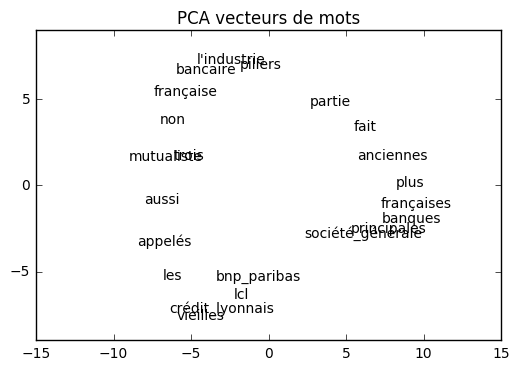

In [5]:
plot_results(do_pca(cooc_matrix.as_matrix()), cooc_matrix.columns)

Notre modèle très simple, capture déjà un certain nombre de **relations intéressantes** :
1. Les termes 'credit_lyonnais', 'lcl' et 'bnp_paribas' apparaissent très proches les uns des autres ;
2. 'societe_generale', 'banques', apparaissent très proches également ;
3. 'bancaire' et 'industrie' sont eux aussi très proches. 

# Présentation d'un modèle : la vectorisation des mots avec Word2Vec
> *"You shall know a word by the company it keeps"* (Firth, J. R. 1957:11)


L'algorithme Word2Vec a été développé pour permettre de **représenter des mots sous forme de vecteurs qui sont d'autant plus proches que leur proximité sémantique est grande**. Cette proximité sémantique est apprise par l'algorithme seul (unsupervised machine learning) en analysant le **contexte** (fenêtre de mots) dans lequel les mots appartiennent (exemple : les mots "Société Générale" et "Banque" apparaissent fréquemment ensemble).

L'algorithme, après entraînement, sera capable de dire quels mots sont probables à la place du point d'interrogation dans l'illustration ci-dessous.

<!-- <img src = './images/word2vec.png' /> -->
 <img src='./images/find.png' /> 

## Etape 1 : la création de la base d'entraînement

La **base d'entraînement** de l'algorithme Word2Vec reprend le concept de **sac de mots**. Sa constitution revient à :
+ parcourir **les mots un à un** (chaque mot est mot central tour à tour) ; 
+ créer une ligne avec le mot central en premier, **chaque mot de la fenêtre** en deuxième tour à tour. 

Par exemple ci-dessous, lorsque le mot central est *français*, les lignes générées sont au nombre de 4 (pour une fenêtre avec $\mathsf{n=2}$), commencent toutes par le mot central *français* et sont donc (français, grande), (français, banque), (français, société générale), (français, activité).
 <img src='./images/skipg.png' /> 

## Etape 2 : un réseau de neurones pour prédire les autres mots dans un sac de mots

L'entraînement de l'algorithme **Word2Vec** repose sur un **réseau de neurones simple**. Le réseau de neurones est considéré comme simple étant donné qu'il n'y a qu'**une seule couche de neurones cachée** (*hidden layer*).

Pour comprendre son fonctionnement, appuyons-nous sur l'illustration ci-dessous et regardons comment le mot "Société Générale" est traité par l'algorithme. 

***

Il y a trois couches de neurones:
+ **Couche 1 : Input Vector** : cette couche est un vecteur de taille le nombre de mots différents dans le corpus (dictionnaire de mots) et égal à 0 en tout point sauf pour le mot considéré (ici *société_generale*) ;
+ **Couche 2 : Hidden Layer** : l'*input vector* est utilisé 300 fois pour créer les 300 neurones de l'*hidden layer* (vecteur de taille 300) qui correspond à une combinaison linéaire de l'input layer avec des points différents, différents dans les 300 cas (les $\mathsf{a_i^k}$ dans l'illustration) - il faut noter que comme l'*input vecteur* n'est considéré que d'un 1 à la kème position pour le kème mot du dictionnaire, l'*hidden layer* correspond à 10000 vecteurs de 300 nombres, tous propres à un unique mot du dictionnaire  ;
+ **Couche 3 : Output Layer** : les 300 résultats calculés dans l'*input layer* sont eux-mêmes utilisés 10 000 fois par l'*output layer* qui consiste en un vecteur de taille 10 000 et qui est contraint d'être calculé comme une combinaison linéaire de l'*hidden layer* et de poids (les $\mathsf{b^k_i}$ dans le cas de l'illustration).

 <img src='./images/layers.png' /> 

Toutes les pondérations (les $\mathsf{a^k_i}$ et $\mathsf{b^i_k}$) sont **initialement tirées au hasard**. **Entraîner le modèle**, c'est-à-dire le calibrer, consiste à **trouver les pondérations** les meilleures pour que, sur la base d'entraînement, pour un mot du dictionnaire fixé, X, l'*ouptut layer* donne la probabilité d'obtenir Y dans la fenêtre du mot, sachant que le mot principal est X.

Par exemple, dans l'illustration ci-dessus, après calibration, l'output layer m'informe que sachant que je m'intéresse à *société_générale*, la probabilité d'avoir *banque* dans la fenêtre que j'étudie est de 89%.

 <img src='./images/entrai.png' /> 

Si cet exercice a une utilité en soi, ce qui nous intéresse, ce sont les **pondérations de la *hidden layer*** puisqu'elles **résument en 300 nombres (vecteur de taille 300), le mot**. 

En effet, un mot proche de *société_générale*, comme *hsbc*, aura des mots dans sa fenêtre semblables à ceux de la fenêtre de *société_générale* et l'algorithme aura donc choisi comme vecteur de l'*hidden layer* un vecteur proche de celui de *société_générale* sans quoi, l'*output layer* de *hsbc* ne prédira pas les mêmes mots que *société_générale*.

 <img src='./images/VEC.png' /> 

## Résultat : des vecteurs "sémantiques"

Afin d'illustrer le résultat, nous utilisons **une base préentrainée sur Wikipedia en Français**. On utilise une représentation graphique du résultat pour illustrer le fait que l'algorithme parvient à rapprocher les mots sémantiquement proches.

# Références
* T. Mikolov (2013): Distributed Representations of Words and Phrases and their Compositionality https://arxiv.org/pdf/1310.4546.pdf
* Y Bengio (2003): A Neural Probabilistic Language Model  https://papers.nips.cc/paper/1839-a-neural-probabilistic-language-model.pdf
* Christopher D. Manning (1999): Foundations of Statistical Natural Language Processing http://ics.upjs.sk/~pero/web/documents/pillar/Manning_Schuetze_StatisticalNLP.pdf
* Facebook word vectors: https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md